In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# inputs

In [11]:
# The mass of the object in the throwing motion (kg)
mass = 0.4
#The density of the fluid around the object (kg/m3)
p = 1.2
#The gravitational acceleration acting uppon the (m/s2)
g = 9.82
#radius of object
r = 0.1 
#The frontal area of the object (m2)
A = math.pi * (r**2)
#The drag coeficient of the object
Cd = 0.47
#The difference in time between the points
deltaT = 0.01
#The starting velocity
v0 = 40
#The starting angle
a0 = 35
#The starting x position 
x0 = 0
#The starting y position
y0 = 0


# Calculating steps

In [12]:
#Calculated values
Kd = 0.5*Cd*p*A
vx0 = v0 * math.cos(math.radians(a0))
vy0 = v0 * math.sin(math.radians(a0))

#Creating the arrays for x and y possitions
xPositions = np.array([x0])
yPositions = np.array([y0])

In [13]:
def calcFd(tempKd, tempVx, tempVy):
    """Function to calculate the drag force"""
    return tempKd*(tempVx**2 + tempVy**2)

def calcFx(tempFd, tempA):
    """Calculating the forces in the x direction"""
    return -tempFd * math.cos(math.radians(tempA))

def calcFy(tempM, tempG, tempFd, tempA):
    """Calculating the forces in the y direction"""
    return -tempM * tempG - tempFd * math.cos(math.radians(tempA))

def calcAccel(tempF, tempM):
    """Calculating the accelleration from force and mass"""
    return tempF/tempM

def calcVelocity(tempVx, tempVy):
    """Calculating the velocity based uppon its x and y components"""
    return math.sqrt(tempVx**2 + tempVy**2)

def calcAngle(tempVx,TempVy):
    """Calculating the angle of the resulting force from x and y components"""
    return math.atan((tempVx / TempVy))
    
    
    

In [14]:
#Creating temporary values for position and current time
x = x0
y = y0
t = 0
#Assigning the temportary values to the starting values
Vx = vx0
Vy = vy0
Angle = a0

#Simulating the throwing motion
while(y >= 0):
    #Calculating the drag force
    Fd = calcFd(Kd, Vx, Vy)
    
    #calculating the forces acting uppon the object in x and y direction
    Fx = calcFx(Fd, Angle)
    Fy = calcFy(mass, g, Fd, Angle)
    
    #calculating the accelleration acting uppon the model
    Ax = calcAccel(Fx, mass)
    Ay = calcAccel(Fy, mass)
    
    #Calculating the new velocety of the model 
    Vx = Vx + Ax * deltaT
    Vy = Vy + Ax * deltaT
    
    #Calculating the new angle 
    Angle = calcAngle(Vx, Vy)
    
    #Calculating the new position
    x = x + Vx * deltaT
    y = y + Vy * deltaT
    
    #Storing the new possition
    xPositions = np.concatenate((xPositions, np.array([x])))
    yPositions = np.concatenate((yPositions, np.array([y])))


In [15]:
print(f'Det gjordes {xPositions.size} punkter')

Det gjordes 779 punkter


# Output

<function matplotlib.pyplot.show(close=None, block=None)>

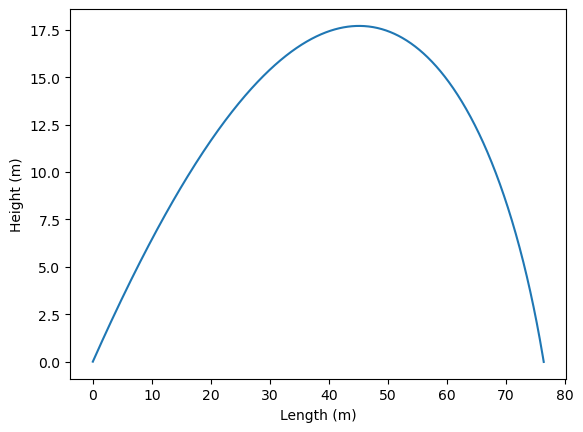

In [16]:
plt.plot(xPositions, yPositions)
plt.xlabel("Length (m)")
plt.ylabel("Height (m)")
plt.show

# Finding the cordinates to the highest point

In [17]:
maxIndex = np.argmax(yPositions)
maxCordinates = np.array([xPositions[maxIndex], yPositions[maxIndex]])
print(f"Kordinaterna för maxpunkten är {maxCordinates}")

Kordinaterna för maxpunkten är [45.11442041 17.70818256]


# Finding the length of the throw

In [18]:
print(f"Kastlängden är {xPositions[-1]}")

Kastlängden är 76.40919763463786
